In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [2]:
black_friday=pd.read_csv('C:\\Users\\Farnaz javan pour\\Desktop\\dataset\\black friday dataset\\Black-Friday-Sales-master\\Data\\BlackFriday.csv')
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


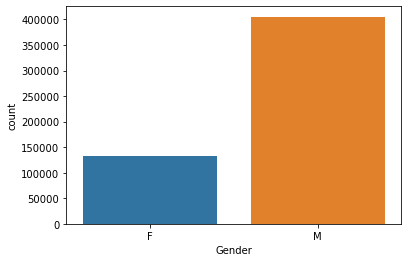

In [4]:
sns.countplot(black_friday['Gender'])

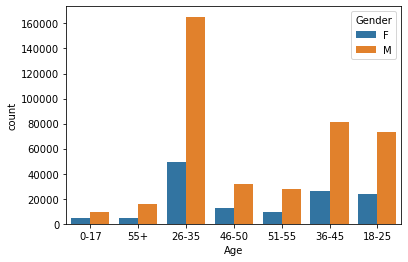

In [5]:
sns.countplot(black_friday['Age'],hue=black_friday['Gender'])

In [6]:
black_friday.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [7]:
black_friday['User_ID'].nunique()

#how many user ?

5891

In [9]:
black_friday['Product_ID'].nunique()

3623

In [10]:
def unique(columns):
    x=np.array(columns)
    print(np.unique(x))
    

In [11]:
print('the unique ID numbers of custumers occupations :')
unique(black_friday['Occupation'])

the unique ID numbers of custumers occupations :
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [12]:
oocupation_id=list(range(0,21))

spent_money=[]
for oid in oocupation_id:
    spent_money.append(black_friday[black_friday['Occupation']==oid]['Purchase'].sum())

In [13]:
spent_money

[625814811,
 414552829,
 233275393,
 160428450,
 657530393,
 112525355,
 185065697,
 549282744,
 14594599,
 53619309,
 114273954,
 105437359,
 300672105,
 71135744,
 255594745,
 116540026,
 234442330,
 387240355,
 60249706,
 73115489,
 292276985]

In [18]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects=('0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20')
print(np.arange(len(objects)))
y_pos=np.arange(len(objects))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


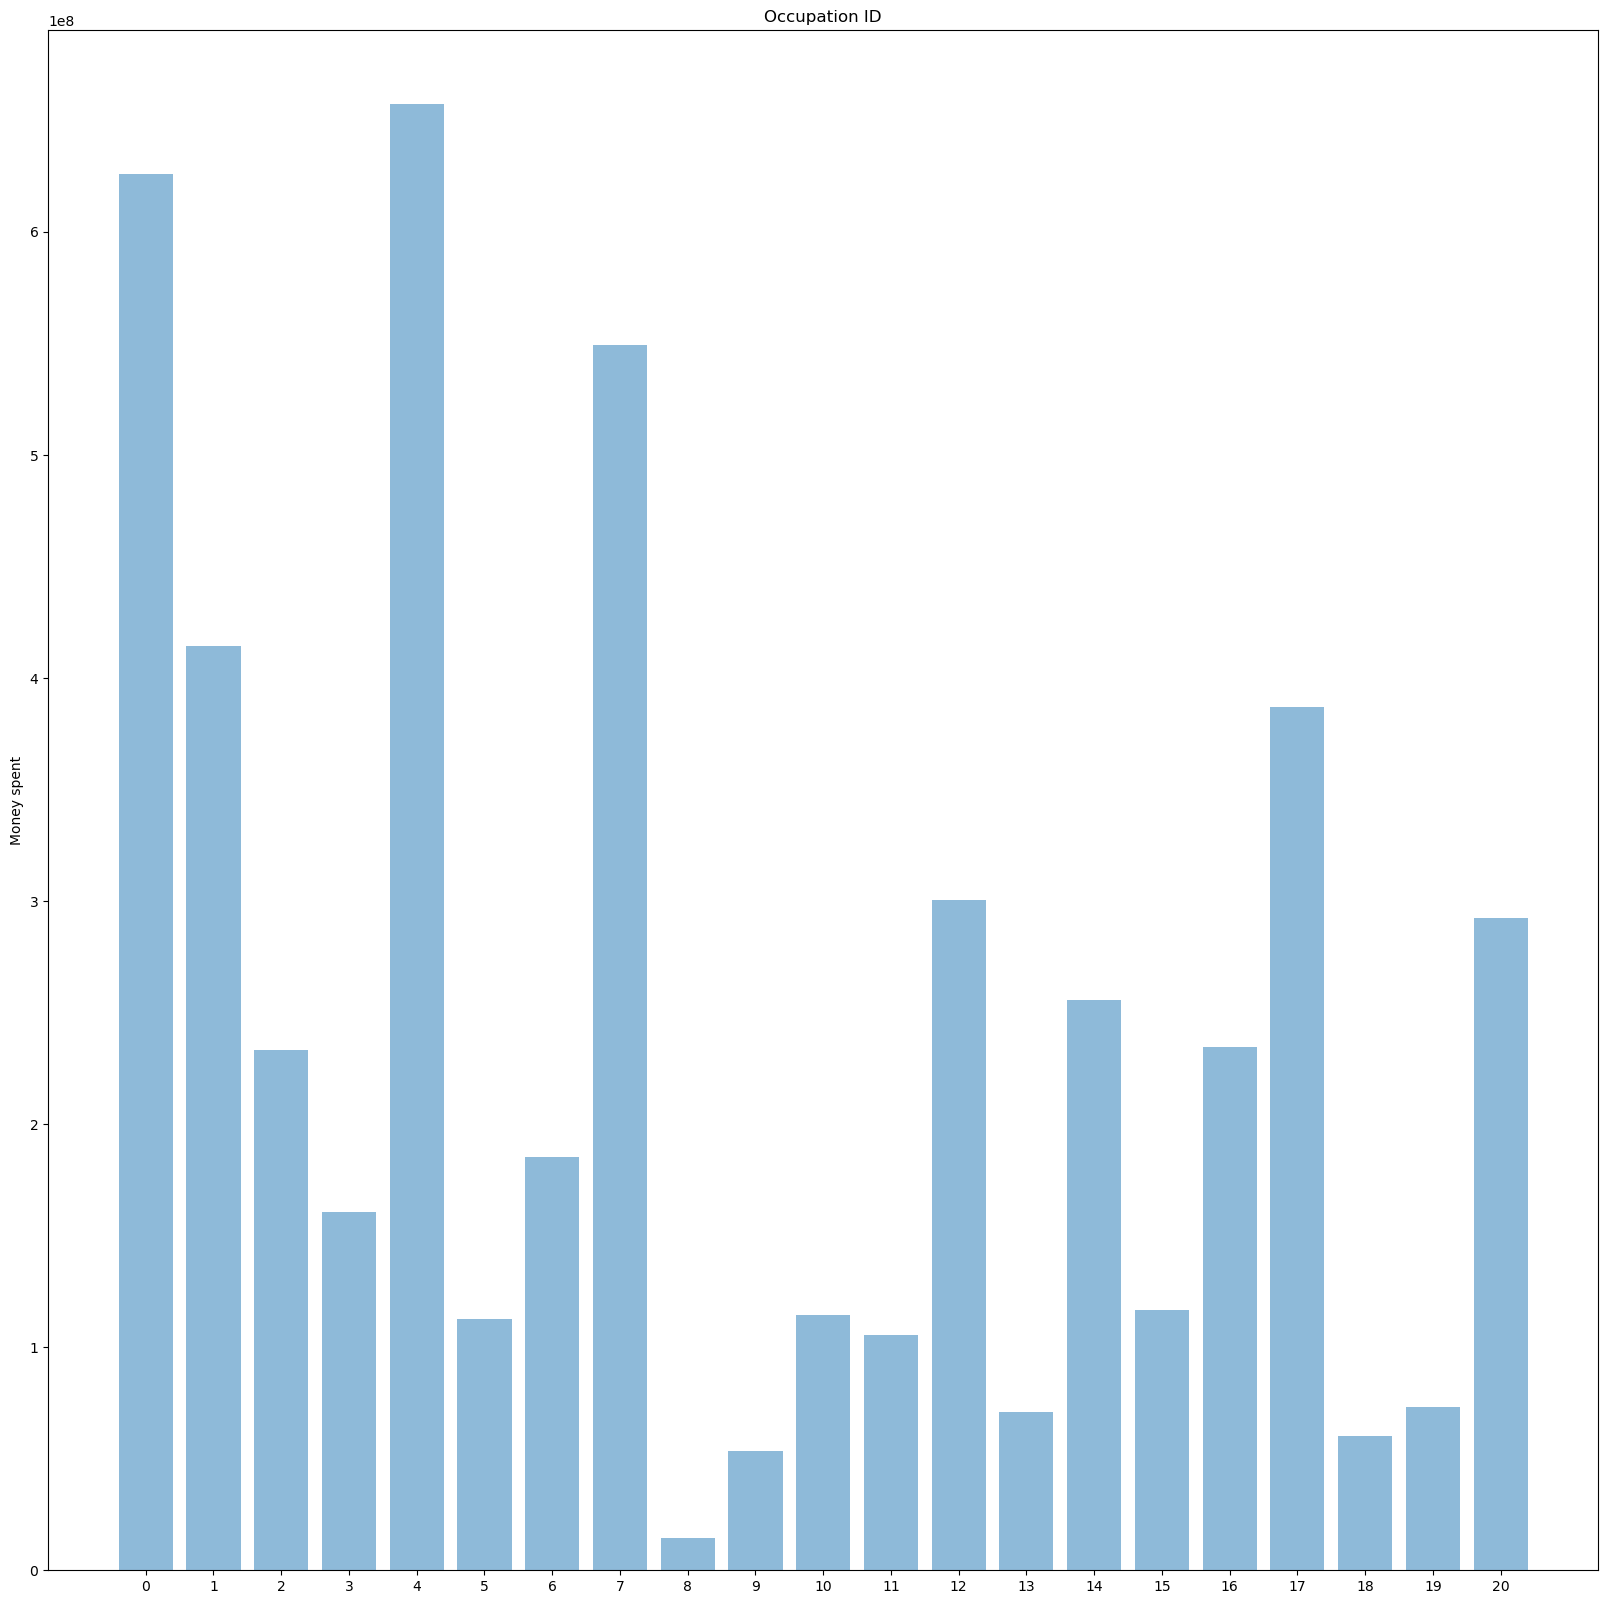

In [21]:
plt.figure(figsize=(20,20))
plt.bar(y_pos,spent_money,align='center',alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Money spent')
plt.title('Occupation ID')


plt.show()

In [22]:
black_friday['City_Category'].nunique()

3

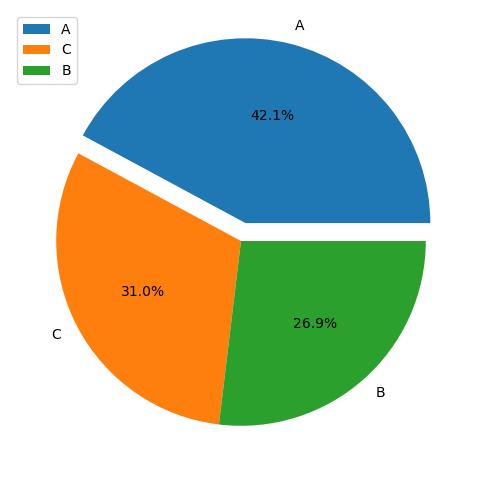

In [26]:
explode=(0.1,0,0)
fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(black_friday['City_Category'].value_counts(), explode=explode, labels=black_friday['City_Category'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()

In [27]:
black_friday=black_friday.drop(['Product_Category_3'],axis=1)


In [29]:
black_friday['Product_Category_2'].fillna((black_friday['Product_Category_2'].mean()), inplace=True)

In [30]:
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Purchase                    537577 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 45.1+ MB


In [32]:
black_friday=black_friday.drop(['User_ID','Product_ID'],axis=1)


In [33]:
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      537577 non-null  object 
 1   Age                         537577 non-null  object 
 2   Occupation                  537577 non-null  int64  
 3   City_Category               537577 non-null  object 
 4   Stay_In_Current_City_Years  537577 non-null  object 
 5   Marital_Status              537577 non-null  int64  
 6   Product_Category_1          537577 non-null  int64  
 7   Product_Category_2          537577 non-null  float64
 8   Purchase                    537577 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 36.9+ MB


In [37]:
df_Gender=pd.get_dummies(black_friday['Gender'])
df_Age=pd.get_dummies(black_friday['Age'])
df_city_category=pd.get_dummies(black_friday['City_Category'])
df_Stay_In_Current_City_Years=pd.get_dummies(black_friday['Stay_In_Current_City_Years'])


df_final=pd.concat([black_friday,df_Gender,df_Age,df_city_category,df_Stay_In_Current_City_Years],axis=1)

df_final.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase', 'F', 'M', '0-17', '18-25', '26-35',
       '36-45', '46-50', '51-55', '55+', 'A', 'B', 'C', '0', '1', '2', '3',
       '4+'],
      dtype='object')

In [39]:
x=df_final[['Occupation','Marital_Status','Product_Category_2','F','M','0-17','18-25','26-35','36-45','46-50','51-55','55+','A','B','C','0','1','2','3','4+']]

y=df_final['Purchase']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [46]:
print('Intercept parameter',reg.intercept_)
coeff_df=pd.DataFrame(reg.coef_,x.columns,columns=['Coefficient'])
print(coeff_df)

Intercept parameter 11217.578271160153
                    Coefficient
Occupation             7.545663
Marital_Status       -65.325790
Product_Category_2  -214.697051
F                   -320.150446
M                    320.150446
0-17                -451.975338
18-25               -113.723203
26-35                 52.835714
36-45                103.027093
46-50                 32.898747
51-55                350.718418
55+                   26.218569
A                   -353.974272
B                   -148.971375
C                    502.945647
0                    -87.180193
1                     -4.939393
2                     60.680172
3                     24.557598
4+                     6.881816


In [48]:
prediction=reg.predict(X_test)
print("Predicted purchases (in dollars) for new costumers:", prediction)

Predicted purchases (in dollars) for new costumers: [ 8581.09570887  9276.34472621 10092.95187499 ...  8209.73361497
 11492.61766795 10937.39293266]


In [49]:
from sklearn import metrics

In [50]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))

MAE 3860.4140824761926
MSE 23667620.660427958
